# Cat and Dog Classifier

In [1]:
#important libraries

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Dog and Cat dataset'

/content/drive/MyDrive/Dog and Cat dataset


In [4]:
#set path of the dataset

cat_images_path = "/content/drive/MyDrive/Dog and Cat dataset/Cat"
dog_images_path = "/content/drive/MyDrive/Dog and Cat dataset/Dog"

In [5]:
print("Number of cat Images: ", len(os.listdir(cat_images_path)))
print("Number of Dog Images: ", len(os.listdir(dog_images_path)))

Number of cat Images:  500
Number of Dog Images:  500


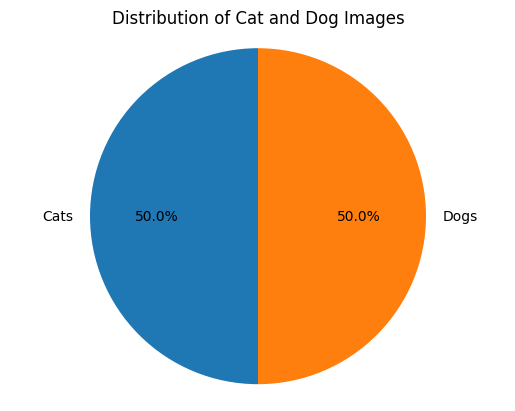

In [6]:
# Get the number of cat and dog images
num_cats = len(os.listdir(cat_images_path))
num_dogs = len(os.listdir(dog_images_path))

# Create the labels and sizes for the pie chart
labels = ['Cats', 'Dogs']
sizes = [num_cats, num_dogs]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cat and Dog Images')
plt.show()


In [7]:
# constant image size
image_size = (180, 180)
image_width, image_height = image_size

In [8]:
# Function to read images and create a numpy arrays

def load_images_from_folder(folder_path, label):
  images =[]
  labels = []
  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert('RGB')
    img = img.resize(image_size)
    img_array = np.array(img)
    images.append(img_array)
    labels.append(label)

  return images, labels

In [9]:
# loading cat and dog images

cat_images, cat_labels = load_images_from_folder(cat_images_path, 0)          # 0 label for cat
dog_images, dog_labels = load_images_from_folder(dog_images_path, 1)          # 1 label for dog

# Combine data
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

In [10]:
# scalling images

X= X/225

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Data Augentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

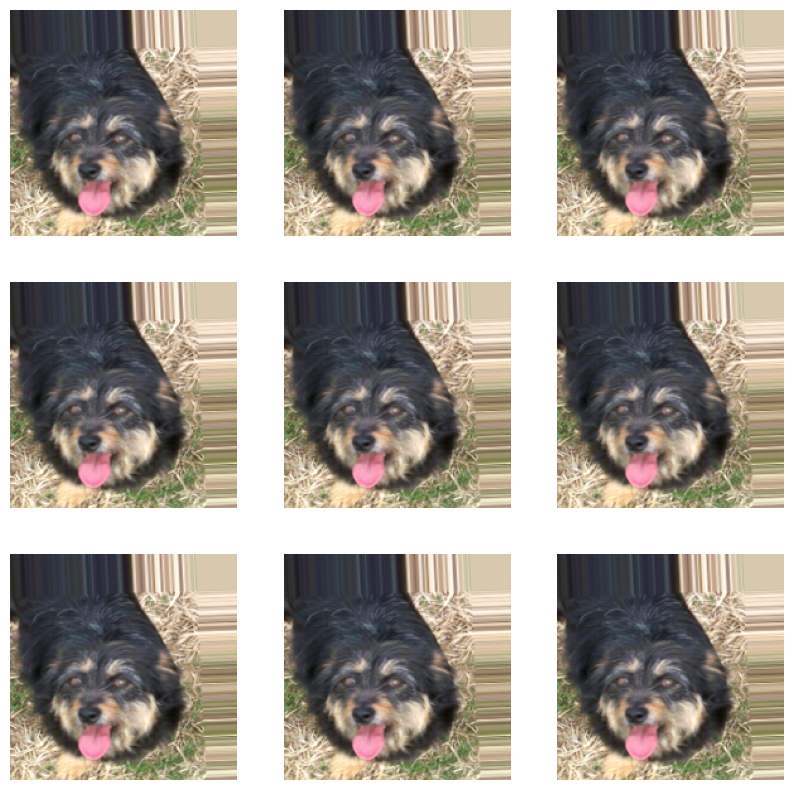

In [13]:
# Visualize some images with augementation

def plot_augmented_images(datagen, images):
  plt.figure(figsize=(10, 10))
  for i in datagen.flow(images, batch_size=9):
    for j in range(9):
      plt.subplot(3, 3, j+1)
      plt.imshow(i[0])
      plt.axis('off')
    break

  plt.show()

# Plot augmented images
plot_augmented_images(datagen, X_train[:10])

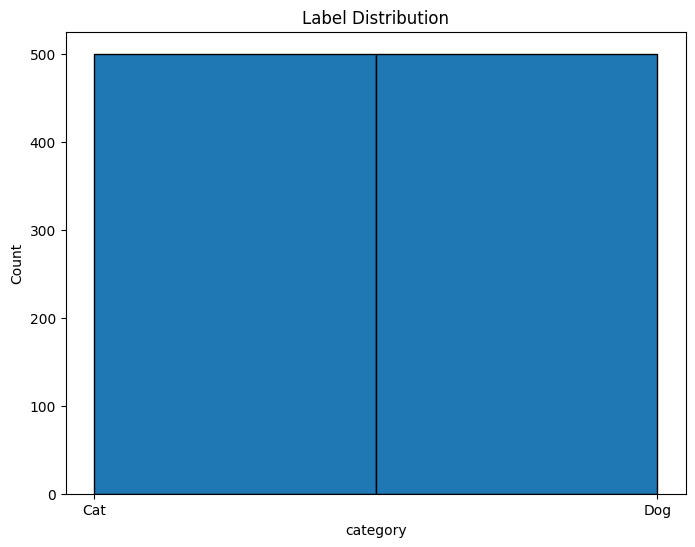

In [14]:
def plot_label_distribution(labels, title):
  plt.figure(figsize=(8, 6))
  plt.hist(labels,bins=2, edgecolor='black')
  plt.xticks([0,1], ["Cat", "Dog"])
  plt.xlabel('category')
  plt.ylabel('Count')
  plt.title(title)
  plt.show()

#plot label distribution
plot_label_distribution(y, 'Label Distribution')

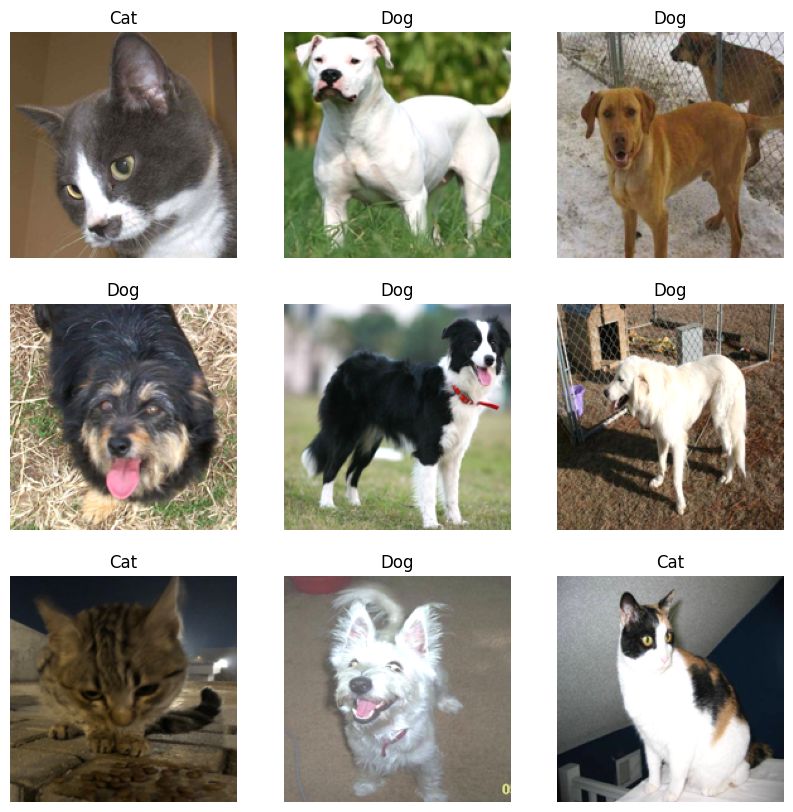

In [16]:
# displaying some original images

def plot_images(images, labels):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title('Cat' if labels[i]== 0 else 'Dog')
    plt.axis('off')
  plt.show()

# Plot some images
plot_images(X_train[:9], y_train[:9])

In [17]:
# summary of dataset

print(f"Total number of images: {len(X)}")
print(f"Total number of labels: {len(y)}")
print(f"Training Images: {len(X_train)}")
print(f"Testing Images: {len(X_test)}")
print(f"Training Labels distribution: {np.bincount(y_train)}")
print(f"Testing Labels distribution: {np.bincount(y_test)}")

Total number of images: 1000
Total number of labels: 1000
Training Images: 800
Testing Images: 200
Training Labels distribution: [404 396]
Testing Labels distribution: [ 96 104]


# Model Building

In [19]:
# Definig the model

model = Sequential()

#1st layer
model.add(Conv2D(filters = 32, kernel_size=(3, 3), padding = 'same', activation = 'relu', input_shape = (image_width, image_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#2nd layer
model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#3rd Layer
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#4th Layer
model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#5th Layer
model.add(Conv2D(filters = 256, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#flattenin the image
model.add(Flatten())
#dense layer
model.add(Dense(512, activation ='relu'))
#dropout layer
model.add(Dropout(0.5))
#output layer
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Model Training

In [21]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10,
                    validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train) // 32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 445ms/step - accuracy: 0.4476 - loss: 0.6942 - val_accuracy: 0.5950 - val_loss: 0.6916
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5950 - val_loss: 0.6916
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.5313 - loss: 0.6919 - val_accuracy: 0.5900 - val_loss: 0.6889
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5900 - val_loss: 0.6889
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.5264 - loss: 0.6920 - val_accuracy: 0.5900 - val_loss: 0.6851
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5900 - val_loss: 0.6851
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.5583 - loss: 0.6866 - val_accuracy: 0.5650 - val_loss: 0.6775
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5650 - val_loss: 0.6775
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.6126 - loss: 0.6773 - val_accuracy: 0.5100 - val_loss: 0.6998
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 -

# Model Evaluation

In [22]:
loss,accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5084 - loss: 0.7027
Test Loss: 0.6998263597488403
Test Accuracy: 0.5099999904632568
